# Predicting heart disease using machine learning
This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
## 1. problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.data

the original data came from the cleaveland data from the UCI machine learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3.Evaluation
 ARe there even enough patterns to learn in the data for our model to predict.
> if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept(initial testing phase), we'll pursue the project.

## 4.Features

This is where u'll get different info about each of the features in your data.

**Create data dictionary**
Feature	Description	Example Values
* age	Age in years	29, 45, 60
* sex	1 = male; 0 = female	0, 1
* cp	Chest pain
    * type	0: Typical angina (chest pain),
    * 1: Atypical angina (chest pain not related to heart),
    * 2: Non-anginal pain (typically esophageal spasms (non heart related),
    * 3: Asymptomatic (chest pain not showing signs of disease)
* trestbps	Resting blood pressure (in mm Hg on admission to the hospital)	120, 140, 150
* chol	Serum cholesterol in mg/dl	180, 220, 250
* fbs	Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)	0, 1
* restecg	Resting electrocardiographic results	0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy
* thalach	Maximum heart rate achieved	160, 180, 190
* exang	Exercise induced angina (1 = yes; 0 = no)	0, 1
* oldpeak	ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest	0.5, 1.0, 2.0
* slope	The slope of the peak exercise ST segment	0: Upsloping, 1: Flatsloping, 2: Downsloping
* ca	Number of major vessels (0-3) colored by fluoroscopy	0, 1, 2, 3
* thal	Thalium stress result	1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect
* target	Have disease or not (1 = yes; 0 = no)	0, 1
Note: No personal identifiable information (PPI) can be found in the dataset.


In [1]:
 #Create data dictionary

heart_disease_data = {
    "age": "Age of the patient in years",
    "sex": ["Male", "Female"],
    "cp": ["typical angina", "atypical angina", "non-anginal", "asymptomatic"],
    "trestbps": "Resting blood pressure (in mm Hg on admission to the hospital)",
    "chol": "Serum cholesterol in mg/dl",
    "fbs": "Fasting blood sugar > 120 mg/dl (True/False)",
    "restecg": ["normal", "stt abnormality", "lv hypertrophy"],
    "thalach": "Maximum heart rate achieved",
    "exang": "Exercise-induced angina (True/False)",
    "oldpeak": "ST depression induced by exercise relative to rest",
    "slope": "The slope of the peak exercise ST segment",
    "ca": "Number of major vessels (0-3) colored by fluoroscopy",
    "thal": ["normal", "fixed defect", "reversible defect"],
    "num": "The predicted attribute"
}
 

In [2]:
## Preparing the tools

## import EDA(explloratory data analysis0 and plotting libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline  

#plots on notebook
#import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay


In [3]:
import sklearn
sklearn.__version__

'1.4.1.post1'

In [4]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal herre is to find out more about the data and become a subject matter expert on the 
dataset you're working with.

overfitting or underfitting.

1.What question are trying to solve?
2. what kind of data do we have and how do we treat diffrent types??(numerical or categorical)
3. whats missing from the data and how to deal with it?
4. where are the outliers and why should you care about them?
5. How to add,change or remove features to get more out of your data?


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#Lets find out how many of each class there
df["target"].value_counts()   #rleatively balanced problem

target
1    165
0    138
Name: count, dtype: int64

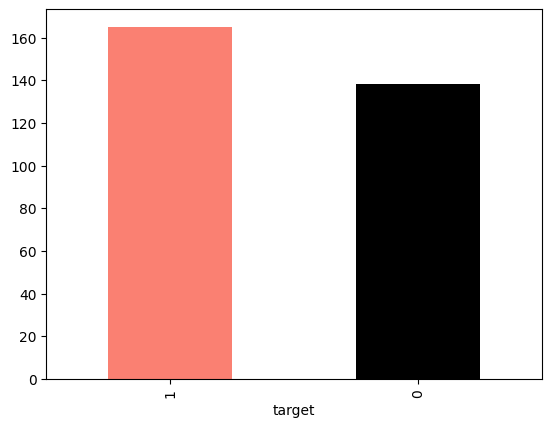

In [8]:
df["target"].value_counts().plot(kind="bar",color=["salmon","black"])
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# Compare target colun with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
#by above we got to know that out of 100 75% chance women has heart disease 
#50% chance that male have heart disease 
#in total there is 62.5% chance that person has heart disease

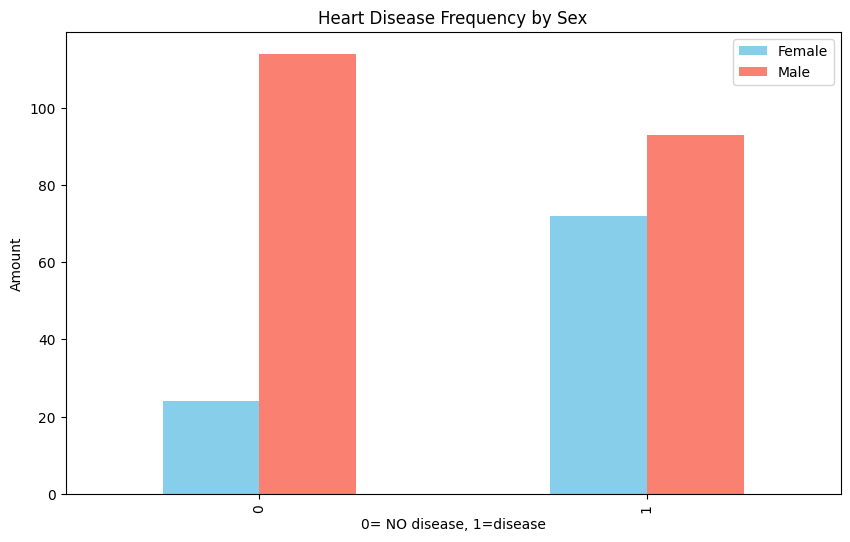

In [15]:
pd.crosstab(df.target, df.sex).plot(kind='bar',figsize=(10,6), color=["skyblue", "salmon"])
plt.xlabel("0= NO disease, 1=disease")
plt.ylabel("Amount")
plt.title("Heart Disease Frequency by Sex")
plt.legend(["Female","Male"])
plt.show()



baseline intution is 62.5% chance that person has heart disease 
based on this we are building machine learning models
subject matter experts

In [16]:
df["thalach"].value_counts() # there are in total 91 different values so we cant use bar chart
 # to represent so we use scatter plot

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age VS. Max Heart Rate for Heart Disease

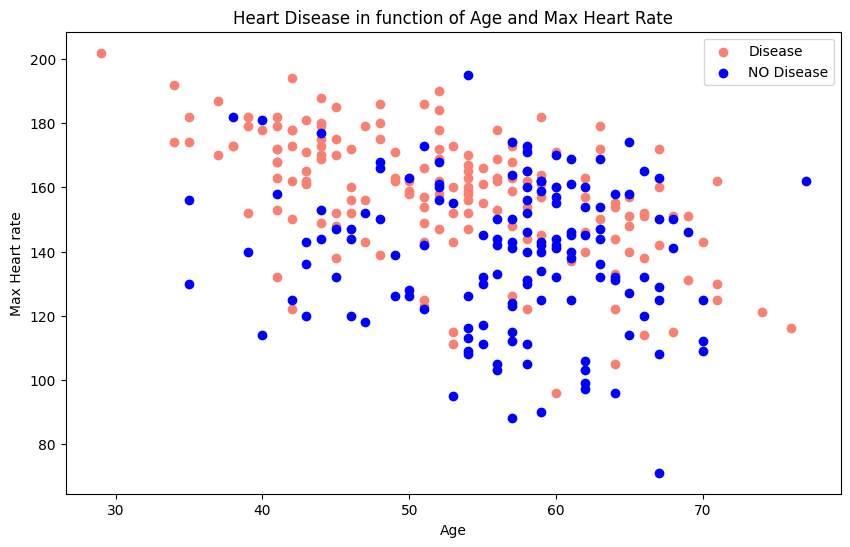

In [17]:
#CReate another figure
plt.figure(figsize=(10, 6))

#scatter with positive examples
plt.scatter(df["age"][df.target==1],
           df["thalach"][df.target==1],
           c="salmon")
plt.scatter(df["age"][df.target==0],
           df["thalach"][df.target==0],
           c="blue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease","NO Disease"])
plt.show()

#### but really we cant see any patterns we can find patterns if we can have more time 
#### this is where machine learning comes handy

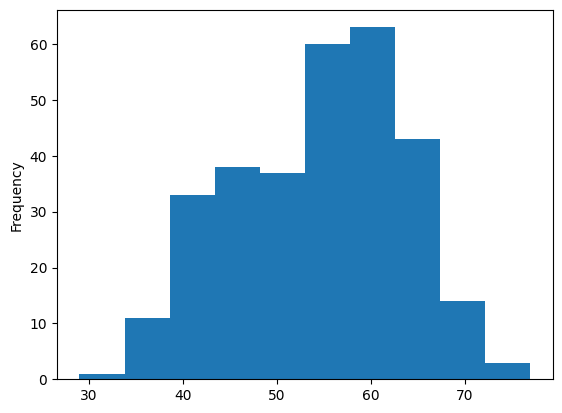

In [18]:
#we are machine learning engineers with data scientists, we prefer algorithm does the job

# Check  The distribution of the age column with a histogram
df.age.plot.hist();
plt.show()

#### Like a bell curve(normal distribution) 

In [19]:
# if someone is above age 150 then we have to clean up no need of considering it even less than 50
# other way called as outliers we need to clean them up that makes ML model do weird things


### Heart Disease Frequency per Chest Pain type
* cp	Chest pain
    * type	0: Typical angina (chest pain),
    * 1: Atypical angina (chest pain not related to heart),
    * 2: Non-anginal pain (typically esophageal spasms (non heart related),
    * 3: Asymptomatic (chest pain not showing signs of disease)

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [21]:
# if we observe above cross tab result we found out that type 2 is non heart related
# but if person has type 2 then there are high chances that person has heart disease
# but that doesnt make any sense even with type 1

### qns to ask till now according to our insights
1. is that true that women have high chances of having heart disease??
2. as age increases heart rate decreases (our insight from second plot)
3. histogram also makes sense
4. 4th doesnt make sense that non heart related pain more heart disease chance???
5. 

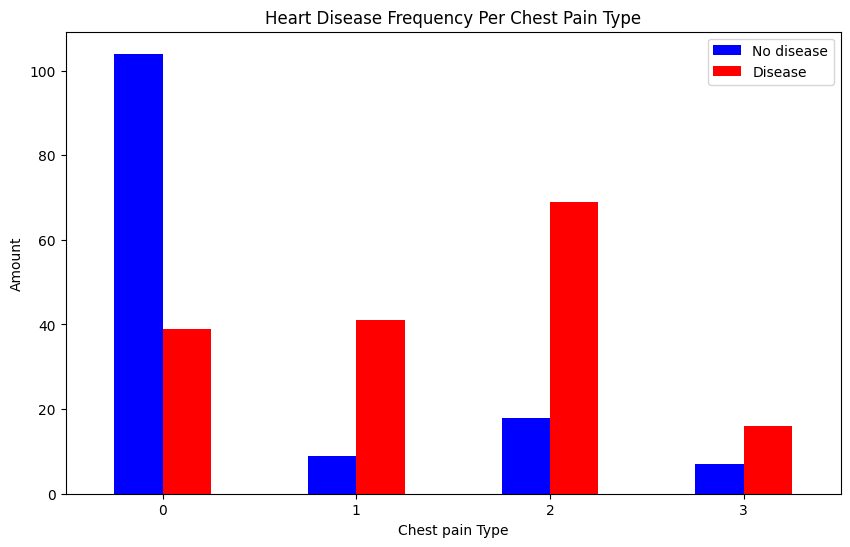

In [22]:
# MAke the cross tab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["blue","red"])
#Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0)
plt.show()


In [23]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


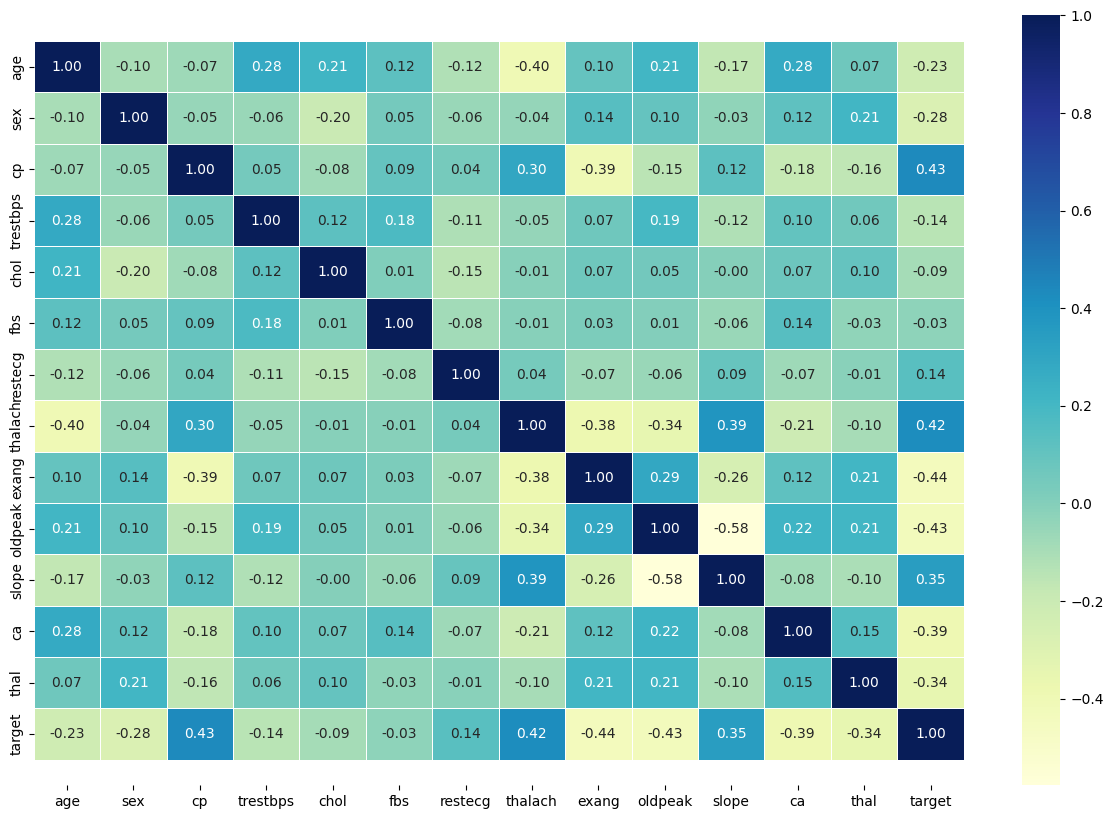

In [24]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom,top =ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [25]:
# now our focus is on cp vs target correlation is 0.43
## Model driven EDA

### Now Data Analysis(1.DATA 2.Evaluation 3.Features) is done lets go into MAchine Learning(5.Modelling) using scikit learn

## 5.Modelling

In [26]:
#whats our problem statement ?? classification problem

#split data into x and y
x=df.drop("target",axis=1)
y=df['target']



In [27]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

NOw we've got our data split into training and test sets ,

it's time to build and we'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.  what model??

we're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [30]:
## we have to write a function with dictionary of models so that we wont rewrite the
##code again and again 
models ={
    "Logistic Regression": LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

#Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different Scikit-Leaqrn machine learning models.
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #set a random seed
    np.random.seed(42)
    #Make a dictionary to keep scores
    model_scores={}
    #Loop through models
    for name,model in models.items():
        #Fit the model to the data
        model.fit(x_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [31]:
model_scores=fit_and_score(models,x_train, x_test, y_train, y_test)
model_scores

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model comparision

In [32]:
type(model_scores)

dict

In [33]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


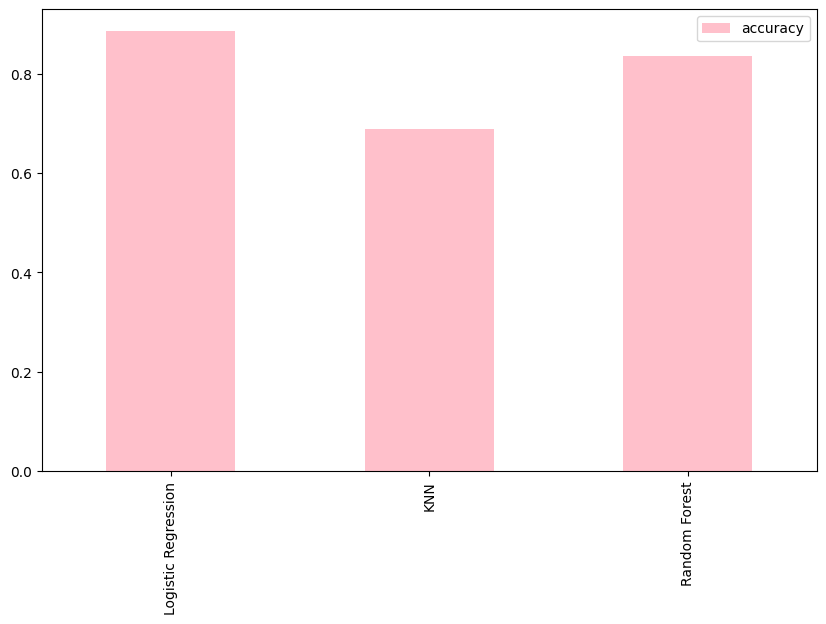

In [34]:
model_compare.T.plot(kind='bar',figsize=(10,6), color=["pink",'green','black'])
plt.show()

### Parameter Tuning, Feature importance, confusion matrix, cross validation


Now we've got our baseline model ... and we know a model's first predictions aren't
always what we should based our next off.
what should do?

Classification and Regression metrics :-
* Accuracy           R^2(r-squared)
* Precision          Mean absolute error(MAE)
* Recall             Mean squared error(MSE)
* F1                 Root mean squared error(RMSE)

* Confusion matrix anatomy:-
    * True positive = model predicts 1 when truth is 1
    * False positive = model predicts 1 when truth is 0
    * True negative = model predicts 0 when truth is 0
    * False negative = model predicts 0 when truth is 1
             


Lets's look at the following
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve(AUC)

#### Tuning Hyperparameters(by hand)

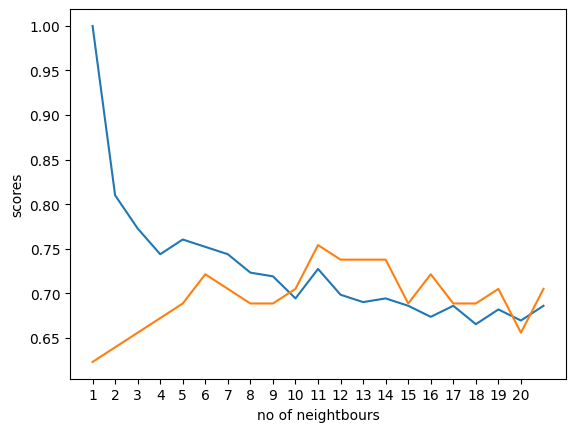

The maximum is at neighbours 11 and max score is 0.7540983606557377


In [35]:
# lets not discard kneighbours as it scored less lets try to change parametrs
#tuing hyperparameters

knn=KNeighborsClassifier()

train_scores=[]
test_scores=[]

i=list(range(1,22))
for neg in i:
    knn.set_params(n_neighbors=neg)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
plt.plot(i,train_scores)
plt.plot(i,test_scores)
plt.xlabel("no of neightbours")
plt.ylabel("scores")
plt.xticks(np.arange(1,21,1))
plt.show()

print(f"The maximum is at neighbours {test_scores.index(max(test_scores))+1} and max score is {max(test_scores)}")

In [36]:
## it is not the best score 75.4% means not so good even after tuning
##lets delete knearest neghbours 


## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegressor()
* RandomForestClassifier()
... using RandomisedSearchCV
  * CV:-cross-validation- 5 fold cross validation(default)
  
  

#### based on chatgpt

In [37]:
from sklearn.metrics import accuracy_score   ##
from scipy.stats import loguniform
param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': loguniform(1e-4, 1e4),
    'solver': ['liblinear', 'saga'],
    'l1_ratio': np.linspace(0, 1, 10)  # Only used if penalty is 'elasticnet'
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit the model
random_search.fit(x_train, y_train)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Test Set Accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'C': 3.2077800037496047, 'l1_ratio': 0.3333333333333333, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Accuracy: 0.8689


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
155 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sk

### according to lecture

In [57]:
# Create a hyperparameter grid for Logisticregression

log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

#Create a hyperparam grid for random classifier
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None, 3, 5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}



In [58]:
# Tune LogisiticRegression

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#Fit the random hyperparameter search model for LogisticRegeression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
print(f"Best params : {rs_log_reg.best_params_}")

Best params : {'solver': 'liblinear', 'C': 0.23357214690901212}


In [60]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression lets do the same for RandomforestClassifier

In [61]:
#Setup random seed

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#Fit the random hyperparameter search model for LogisticRegeression
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [62]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [63]:
rs_rf.score(x_test,y_test)

0.8852459016393442

In [64]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Grid Search CV

1. By hand
2. using RandomizedSearchCV
3. GridSerachCV

### HYperparameter Tuning Using GridSearchCV
Since our LOgisticregression model provides best scores so far,
we'll try again tuning Logisticregression using GridSearchC

In [69]:
#Diffrent Hyperparams for Logistic for our Logistic_regression
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
#SEtup grid hypparam search for LogRegre
gs_log_reg=GridSearchCV(LogisticRegression(),
                      param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)


#Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [70]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [71]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confussion matrix
* Classification report
* Precision
* recall
* F1-score

... and it would be greate if cross-validation was used where
possible.

In [72]:
# it is always means comapring predicted values with truth values
# Make presictilns with tuned model
y_preds = gs_log_reg.predict(x_test)

In [73]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [74]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

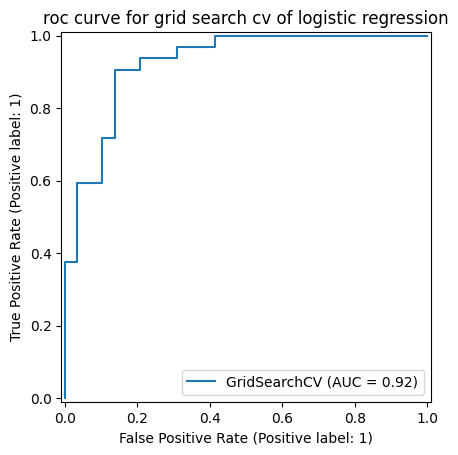

In [78]:
#plot ROC curve and calculate and claculate AUC metric

RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)
plt.title("roc curve for grid search cv of logistic regression")
plt.show()

In [79]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


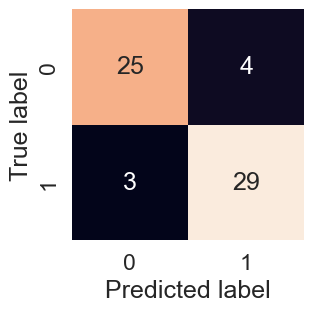

In [87]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
     Plots a nice looking conf mat using seaborn's heatmap
    """
    fig,ax =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

plot_conf_mat(y_test,y_preds)

# which is worse false positive or false negative?
Now we've got ROC curve, AUC metric and confusion matrix, lets get a classification report as well as 
cross-validation precision, recall and f1-score

In [90]:
print(classification_report(y_test,y_preds))  #thid is not enough because it is being 
#done only one fold not on 5 folds y_preds are only on x_testthat is 20% data

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



###  what each says
* 1. Precision:-
     * Penalizes False Positives
* 2. Recall (a.k.a. Sensitivity or True Positive Rate)
     * Penalizes False Negatives
* 3. F1-Score
     * Useful for imbalanced datasets


## evaluation metrics now for cross validated results not only on one
we're going to calculate precision, recall and f1-score of our model
using cross-validation and to do so we'll be using `cross_val_score`

In [91]:
# Check best hyperparams
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [92]:
#Create a new classifier with best params
clf = LogisticRegression(C= 0.20433597178569418,solver='liblinear')

In [98]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [101]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [102]:
#cross-validated precision
cv_prec = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [107]:
cv_prec=np.mean(cv_prec)
cv_prec

0.8215873015873015

In [108]:
#cross-validated recall
cv_rec = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_rec

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [109]:
cv_rec=np.mean(cv_rec)
cv_rec

0.9272727272727274

In [111]:
#cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [112]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

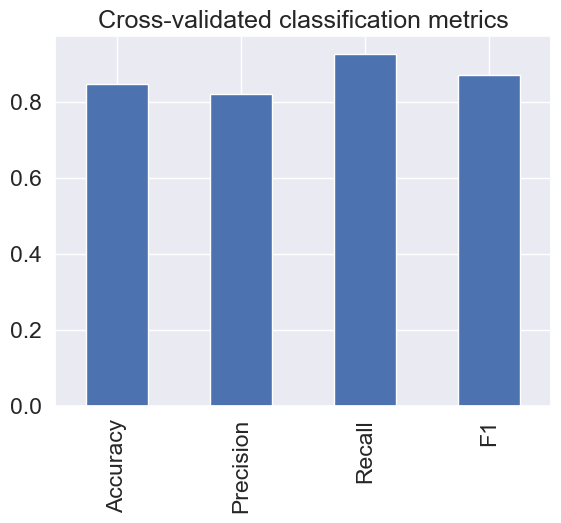

In [117]:
# Visualize cross-validation metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_prec,
                          "Recall":cv_rec,
                          "F1":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)
plt.show()

### Feature importance

Feature importance is another way of asking, "which fetaures contributed
most to the outcomes of the model and how did they contribute?"

Finding features that are important will be different for different models

so use google gow to find important features for logisticRegression
model. One way to find feature importance is to search()

Let's find the feature importance for our LogisticRegression model


In [123]:
# Fit an instance of LogisREg


clf=LogisticRegression(C= 0.20433597178569418,solver='liblinear')
gs_log_reg.best_params_
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [127]:
clf.coef_  # coef is nothing but array of eachh column contributing to target

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [128]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

In [130]:
# Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=["correlation"])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
correlation,0.003208,-0.86062,0.660014,-0.01156,-0.001665,0.040172,0.316034,0.024589,-0.604702,-0.567955,0.450854,-0.637333,-0.675551


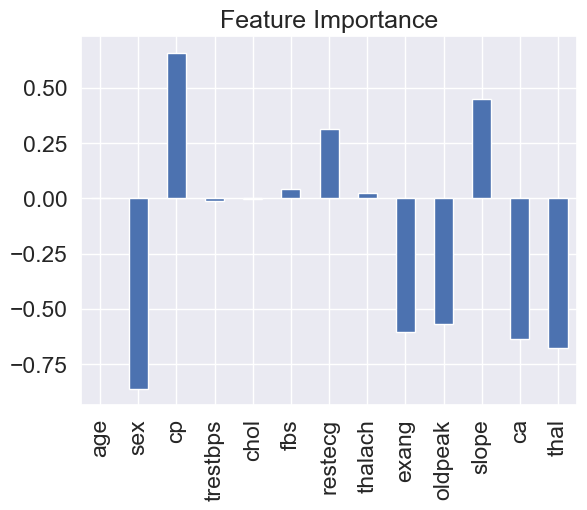

In [132]:
feature_df.T.plot.bar(title="Feature Importance",legend=False)
plt.show()

#### these values are from model driven exploratory data analysis(which has already found patterns in data)

In [134]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [136]:
pd.crosstab(df["slope"],df["target"])  ##positive correlation

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


The slope of the peak exercise ST segment 

0. Upsloping(better heart rate with exercise)(uncommon)
1. Flatsloping(minimal change(typically healthy heart)), 2:
2.  Downsloping(signs of unhealthy heart)

### age,thresbps, and some doesn't even contribute to the prediction

# 6.Experimentation
we've done experimentation already by using logreg ,random forest classi,knn,
tuned hyper params, deleted some models,

If you javen't hit your evaluation metric yet... ask yourself..
* Could you collect more data?
* could u try a better model? Like CatBoost or XGBoost?
* Could we improve current models?(beyond what we have done so far)
* If your model is good enough (you have hit your evaluation metric how would you export it and share it with others ?)